In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import iqr
import seaborn as sns

plt.style.use('fivethirtyeight')

# Using unix time

In [2]:
df = pd.read_csv('./dengue.csv')
df.head()

,Time,dengue-sg
0,9.472900e+11,17
1,9.478940e+11,10
2,9.484990e+11,15
3,9.491040e+11,15
4,9.497090e+11,13


In [3]:
# The time delta are roughly +/- 1 hour from the a week's time (604.8e6)
# so we just check that the time deltas are within the week, i.e., not
# delayed by more than half a week
df["Time"].diff().between(604.8e6 * 0.5, 604.8e6 * 1.5)[1 :].all()

True

# Using human readable time

In [4]:
df2 = pd.read_csv('./dengue_human_times.csv', index_col=[0], parse_dates=[0])
df2.head()

,dengue-sg
Time,
2000-01-08,17
2000-01-15,10
2000-01-22,15
2000-01-29,15
2000-02-05,13


In [5]:
np.isclose(df2.index.to_series().diff().dt.days.div(7)[1 :], 1.0).all()

True

# Find head and tail of data

In [6]:
big_df = pd.read_csv("./all_data.csv", index_col=[0], parse_dates=[0]).replace("-", np.nan).astype(float)
big_df.head()

,dengue-sg,temperature-admiralty,temperature-ang-mo-kio,temperature-boon-lay-east,temperature-changi,temperature-choa-chu-kang-south,temperature-clementi,temperature-east-coast-parkway,temperature-jurong-island,temperature-khatib,...,rainfall-toa-payoh,rainfall-tuas,rainfall-tuas-south,rainfall-tuas-west,rainfall-ulu-pandan,rainfall-upper-peirce-reservoir,rainfall-upper-thomson,rainfall-whampoa,rainfall-yishun,population-sg
human-times,,,,,,,,,,,,,,,,,,,,,
2000-01-08,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3960235.7
2000-01-15,10.0,NaN,NaN,NaN,26.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.6,NaN,10.8,NaN,NaN,3961557.6
2000-01-22,15.0,NaN,NaN,NaN,26.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.8,NaN,14.2,NaN,NaN,3962880.4
2000-01-29,15.0,NaN,NaN,NaN,26.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,NaN,7.0,NaN,NaN,3964203.2
2000-02-05,13.0,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.9,NaN,4.4,NaN,NaN,3965526.0


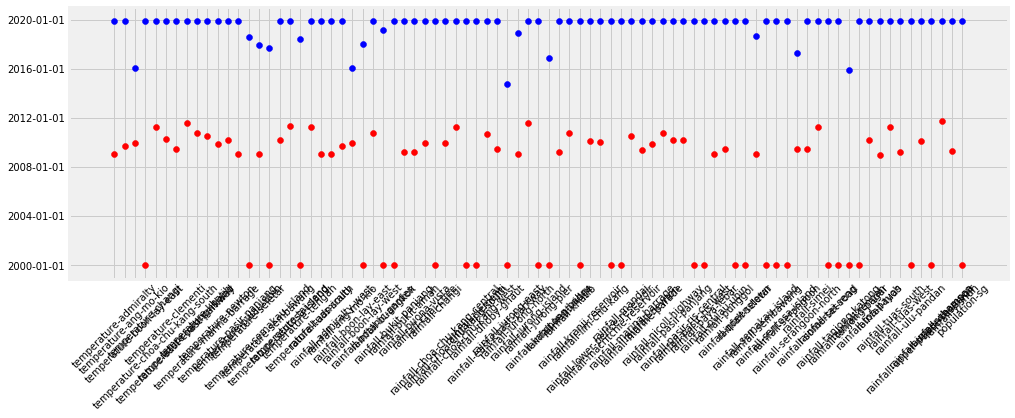

In [7]:
data = {}
for colname in big_df.columns:
    n = big_df[colname].shape[0]
    data[colname] = {}
    res_string = colname
    for i in range(n):
        if not pd.isna(big_df[colname][i]):
            res_string += ";{}".format(big_df.index[i])
            data[colname]["start"] = big_df.index[i]
            break
    for i in range(n):
        j = n - 1 - i
        if not pd.isna(big_df[colname][j]):
            res_string += ";{}".format(big_df.index[j])
            data[colname]["end"] = big_df.index[j]
            break

# for k in data:
#     print("{};{};{}".format(k, data[k]["start"], data[k]["end"]))

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

xfmt = md.DateFormatter('%Y-%m-%d')
ax.yaxis.set_major_formatter(xfmt)
ax.yaxis_date()
ax.scatter(list(data.keys())[1 :], [data[k]["start"] for k in data][1 :], c="r")
ax.scatter(list(data.keys())[1 :], [data[k]["end"] for k in data][1 :], c="b")

plt.xticks(rotation=45)
plt.show()

# Group to regions

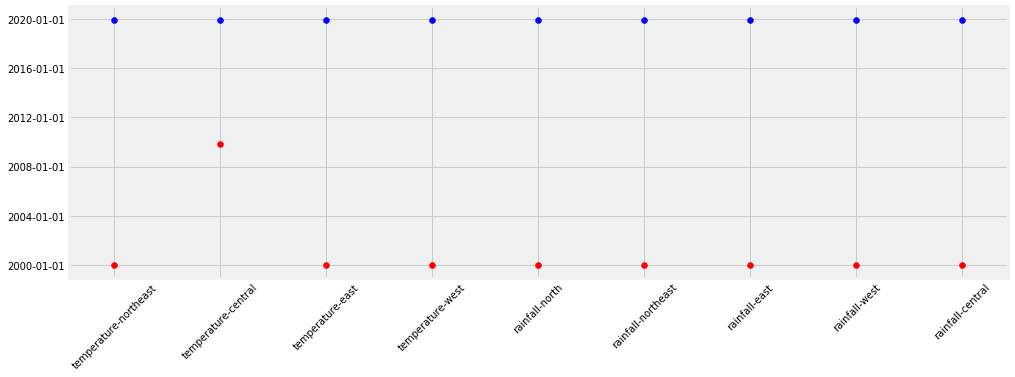

In [8]:
regions = {
    "temperature-north": ["temperature-admiralty", "temperature-khatib", "temperature-sembawang"],
    "temperature-northeast": ["temperature-ang-mo-kio", "temperature-seletar", "temperature-tai-seng"],
    "temperature-central": ["temperature-marina-barrage", "temperature-newton", "temperature-sentosa-island"],
    "temperature-east": ["temperature-changi", "temperature-east-coast-parkway", "temperature-pulau-ubin"],
    "temperature-west": ["temperature-boon-lay-east", "temperature-choa-chu-kang-south", "temperature-clementi",
                         "temperature-jurong-island", "temperature-pasir-panjang", "temperature-semakau-island",
                         "temperature-tengah", "temperature-tuas-south"],
    "rainfall-north": ["rainfall-admiralty", "rainfall-admiralty-west", "rainfall-khatib",
                       "rainfall-kranji-reservoir", "rainfall-lim-chu-kang", "rainfall-mandai",
                       "rainfall-sembawang", "rainfall-yishun"],
    "rainfall-northeast": ["rainfall-ang-mo-kio", "rainfall-buangkok", "rainfall-lower-peirce-reservoir",
                           "rainfall-punggol", "rainfall-seletar", "rainfall-serangoon",
                           "rainfall-serangoon-north", "rainfall-tai-seng", "rainfall-upper-peirce-reservoir",
                           "rainfall-upper-thomson"],
    "rainfall-east": ["rainfall-chai-chee", "rainfall-changi", "rainfall-east-coast-parkway",
                      "rainfall-pasir-ris-central", "rainfall-pasir-ris-west", "rainfall-paya-lebar",
                      "rainfall-pulau-ubin", "rainfall-simei", "rainfall-tanjong-katong"],
    "rainfall-west": ["rainfall-boon-lay-east", "rainfall-boon-lay-west", "rainfall-bukit-panjang",
                      "rainfall-choa-chu-kang-central", "rainfall-choa-chu-kang-south",
                      "rainfall-choa-chu-kang-west", "rainfall-clementi", "rainfall-jurong-east",
                      "rainfall-jurong-north", "rainfall-jurong-island", "rainfall-jurong-pier",
                      "rainfall-kent-ridge", "rainfall-pasir-panjang", "rainfall-semakau-island",
                      "rainfall-tengah", "rainfall-tuas", "rainfall-tuas-south", "rainfall-tuas-west"],
    "rainfall-central": ["rainfall-botanic-garden", "rainfall-bukit-timah", "rainfall-buona-vista",
                         "rainfall-dhoby-ghaut", "rainfall-kampong-bahru", "rainfall-macritchie-reservoir",
                         "rainfall-marina-barrage", "rainfall-marine-parade", "rainfall-newton",
                         "rainfall-nicoll-highway", "rainfall-queenstown", "rainfall-sentosa-island",
                         "rainfall-somerset-road", "rainfall-tanjong-pagar", "rainfall-toa-payoh",
                         "rainfall-ulu-pandan", "rainfall-whampoa"]
}
region_head_tail = {}
for k in regions:
    region_head_tail[k] = {}
    region_head_tail[k]["start"] = min(data[loc]["start"] for loc in regions[k])
    region_head_tail[k]["end"] = max(data[loc]["end"] for loc in regions[k])

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

xfmt = md.DateFormatter('%Y-%m-%d')
ax.yaxis.set_major_formatter(xfmt)
ax.yaxis_date()
ax.scatter(list(region_head_tail.keys())[1 :], [region_head_tail[k]["start"] for k in region_head_tail][1 :], c="r")
ax.scatter(list(region_head_tail.keys())[1 :], [region_head_tail[k]["end"] for k in region_head_tail][1 :], c="b")

plt.xticks(rotation=45)
plt.show()

# Spacial average and normalize population

In [9]:
print("Dengue range: ", big_df["dengue-sg"].max() - big_df["dengue-sg"].min())
print("Dengue mean: ", big_df["dengue-sg"].mean())
dengue_offset = 150
dengue_scale = 880 / 2

big_df["dengue-sg-normalized"] = (big_df["dengue-sg"] - dengue_offset) / dengue_scale

print("Population range: ", big_df["population-sg"].max() - big_df["population-sg"].min())
print("Population mean: ", big_df["population-sg"].mean())
population_offset = 4800000
population_scale = 1730000 / 2

big_df["population-sg-normalized"] = (big_df["population-sg"] - population_offset) / population_scale
for region in regions:
    # mean(axis=1) accounts for nan and doesn't add count to it
    big_df[region] = big_df[regions[region]].mean(axis=1)

Dengue range:  888.0
Dengue mean:  154.16763005780348
Population range:  1736577.2999999998
Population mean:  4865127.161078998


# Extrapolating missing past data

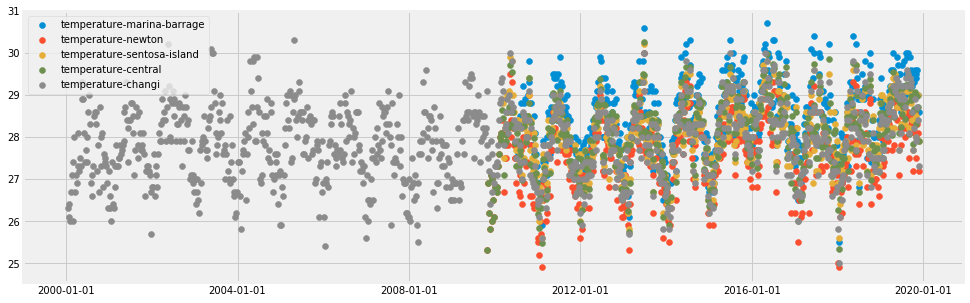

In [10]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date()
ax.scatter(big_df.index, big_df["temperature-marina-barrage"], label="temperature-marina-barrage")
ax.scatter(big_df.index, big_df["temperature-newton"], label="temperature-newton")
ax.scatter(big_df.index, big_df["temperature-sentosa-island"], label="temperature-sentosa-island")

ax.scatter(big_df.index, big_df["temperature-central"], label="temperature-central")
ax.scatter(big_df.index, big_df["temperature-changi"], label="temperature-changi")
plt.legend()
plt.show()

### Using only the first 5 "normal" years to average

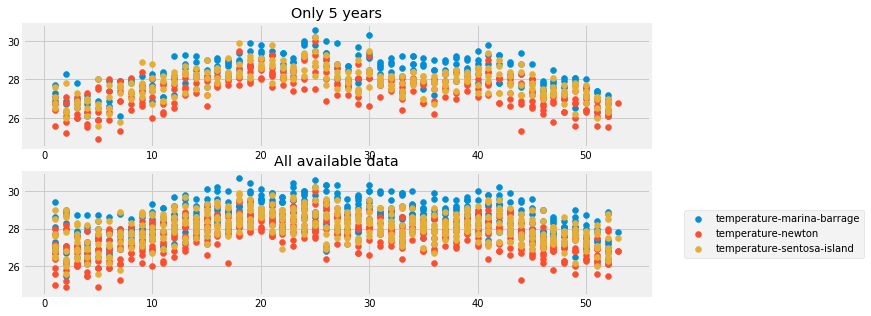

In [11]:
df_central = big_df[regions["temperature-central"]].copy()
df_central['weekofyear'] = df_central.index.weekofyear

f, (ax1, ax2) = plt.subplots(2, 1)
f.set_figheight(5)
f.set_figwidth(10)

five_normal_years = (df_central.index > '2009-10-25') & (df_central.index <= "2015-1-1")

ax1.title.set_text("Only 5 years")
ax2.title.set_text("All available data")
for colname in regions["temperature-central"]:
    ax1.scatter(df_central["weekofyear"].loc[five_normal_years], df_central[colname].loc[five_normal_years],
                label=colname)
    ax2.scatter(df_central["weekofyear"], df_central[colname], label=colname)

plt.legend(loc=7, bbox_to_anchor=(1.35, 0.5))
plt.show()

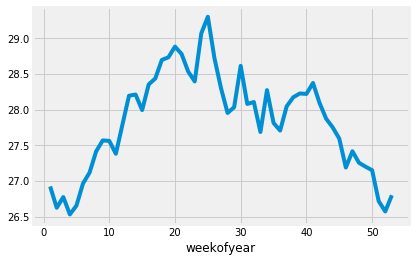

In [12]:
five_year_mean = df_central.loc[five_normal_years].groupby(["weekofyear"]).mean().mean(axis=1)
five_year_mean.plot()

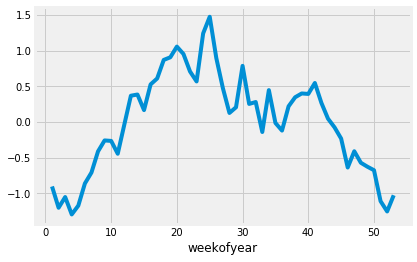

In [13]:
five_year_offset = five_year_mean - five_year_mean.mean()
five_year_offset.plot()

### Extrapolate with no scaling

In [14]:
df_central_mean = big_df[["temperature-central"]].copy()
df_central_mean["temperature-changi"] = big_df["temperature-changi"]
df_central_mean["weekofyear"] = df_central_mean.index.weekofyear
df_central_mean["year"] = df_central_mean.index.year
mean_by_year = df_central_mean.groupby("year").mean()["temperature-changi"]
missing_years = (df_central.index < '2009-10-25')
for i in range(df_central_mean.shape[0]):
    if missing_years[i]:
        year = df_central_mean.loc[missing_years]["year"][i]
        weekofyear = df_central_mean.loc[missing_years]["weekofyear"][i]
        temp = mean_by_year[year] + five_year_offset[weekofyear]
        df_central_mean.at[df_central_mean.index[i], "temperature-central"] = temp
big_df["temperature-central-filled"] = df_central_mean["temperature-central"].copy()

In [15]:
df_central_mean = big_df[["temperature-central"]].copy()
df_central_mean["temperature-changi"] = big_df["temperature-changi"]
df_central_mean["weekofyear"] = df_central_mean.index.weekofyear
df_central_mean["year"] = df_central_mean.index.year
five_year_iqr = iqr(df_central.loc[five_normal_years].groupby(["weekofyear"]).mean().mean(axis=1))

mean_by_year = df_central_mean.groupby("year").mean()["temperature-changi"]
missing_years = (df_central.index < '2009-10-25')
for i in range(df_central_mean.shape[0]):
    if missing_years[i]:
        year = df_central_mean.loc[missing_years]["year"][i]
        curr_iqr = iqr(df_central_mean[df_central_mean["year"] == year]["temperature-changi"], nan_policy="omit")
        weekofyear = df_central_mean.loc[missing_years]["weekofyear"][i]
        temp = mean_by_year[year] + five_year_offset[weekofyear] * curr_iqr / five_year_iqr
        df_central_mean.at[df_central_mean.index[i], "temperature-central"] = temp
big_df["temperature-central-scaled"] = df_central_mean["temperature-central"].copy()

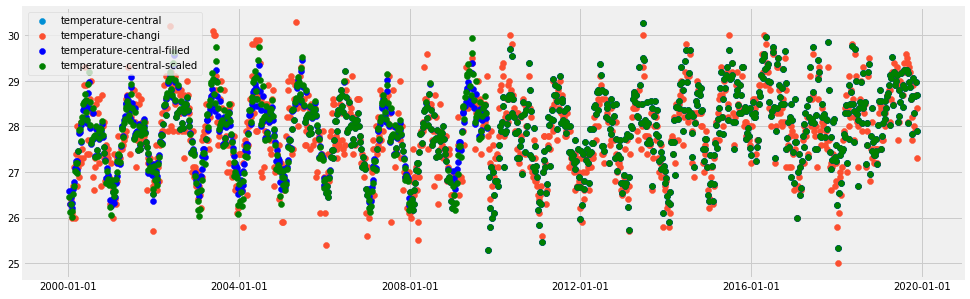

In [16]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date()

ax.scatter(big_df.index, big_df["temperature-central"], label="temperature-central")
ax.scatter(big_df.index, big_df["temperature-changi"], label="temperature-changi")
ax.scatter(big_df.index, big_df["temperature-central-filled"], c="b", label="temperature-central-filled")
ax.scatter(big_df.index, big_df["temperature-central-scaled"], c="g", label="temperature-central-scaled")
plt.legend()
plt.show()

# Temperature by region

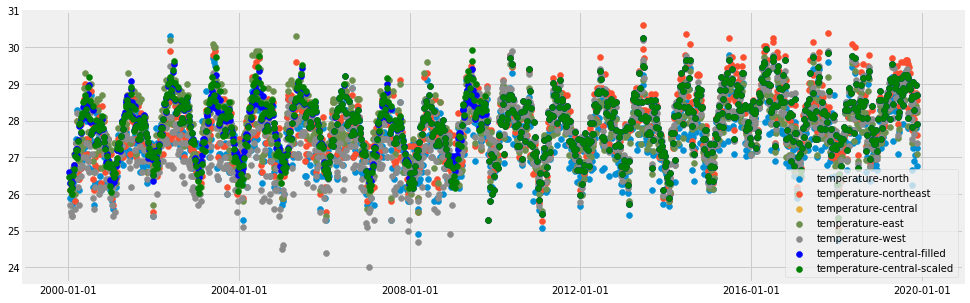

In [17]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date()

for region in regions:
    if "temperature" in region:
        ax.scatter(big_df.index, big_df[region], label=region)
ax.scatter(big_df.index, big_df["temperature-central-filled"], c="b", label="temperature-central-filled")
ax.scatter(big_df.index, big_df["temperature-central-scaled"], c="g", label="temperature-central-scaled")
plt.legend()
plt.show()

# Rainfall by region

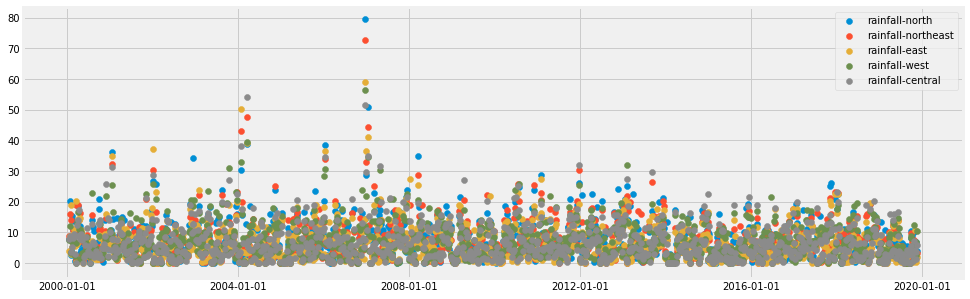

In [18]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date()

for region in regions:
    if "rainfall" in region:
        ax.scatter(big_df.index, big_df[region], label=region)
plt.legend()
plt.show()

# Interpolate

In [19]:
for colname in ["temperature-north", "temperature-northeast", "temperature-east", "temperature-west"]:
    big_df[colname] = big_df[colname].interpolate()

In [20]:
big_df.to_csv("all_data_extrapolated.csv")